- Apply transpose convolution in practical scenarios using Keras.  

- Create, compile, train, and evaluate the model

- Visualize the results  

**Step 1 : Import Necessary Libraries**

In [7]:
import warnings
warnings.filterwarnings('ignore')

!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, UpSampling2D, Conv2DTranspose # Import Conv2DTranspose

import numpy as np
import matplotlib.pyplot as plt

**Step 2 : Define the Input Layer**

We need to define the input shape for your model. For simplicity, let's assume we are working with an input image of size 28x28 with 1 channel (grayscale).

In [8]:
input_layer = Input(shape=(28,28,1))

Input(shape=(28, 28, 1)) creates an input layer that expects 28x28 grayscale images.

**Step 3 : Add convolutional and Transpose convolutional Layers**

We will add a convolutional layer to extract features, followed by a transpose convolution layer to reconstruct the image.

In [9]:
conv_layer = Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation='relu',
    padding='same'
)(input_layer)

transpose_conv_layer = Conv2DTranspose(
    filters = 1,
    kernel_size = (3,3),
    activation = 'sigmoid',
    padding = 'same'
)(conv_layer)

Explanation:

Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same') creates a convolution layer with 32 filters.

Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same') creates a transpose convolution layer for reconstructing the image.

**Step 4 : Create the Model**

In [11]:
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

Explanation:

Model(inputs=input_layer, outputs=transpose_conv_layer) creates a Keras model that connects the input layer to the output layer through the convolutional and transpose convolutional layers.

**Step 5 : Compile the Model**

In [12]:
model.compile(optimizer='adam', loss='mean_squared_error')

Explanation:

    optimizer=adam specifies the Adam optimizer.

    loss=binary_crossentropy specifies the binary cross-entropy loss function, suitable for binary pixel classification.


**Step 6: Train the Model**

In [14]:
# Generate synthetic training data

x_train = np.random.rand(1000, 28, 28,1)
y_train = x_train #for reconstrction, the target is the input

history = model.fit(x_train, y_train, epochs =10, batch_size=32, validation_split = 0.2)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0797 - val_loss: 0.0644
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0585 - val_loss: 0.0396
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step - loss: 0.0341 - val_loss: 0.0191
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0161 - val_loss: 0.0090
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0078 - val_loss: 0.0050
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0046 - val_loss: 0.0035
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0033 - val_loss: 0.0027
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0026 - val_loss: 0.0023
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 0.0022 - val_loss: 0.0020
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0020 - val_loss: 0.0019


Explanation:

    X_train is a placeholder for your actual training data.

    y_train is the same as X_train for image reconstruction.

    model.fit trains the model for a specified number of epochs and batch size.


**Step 7 : Evaluate the Model**

In [15]:
# Generate synthetic test data

x_test = np.random.rand(200,28,28,1)
y_test = x_test

loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0019
Test loss: 0.0019093782175332308


X_test and y_test are placeholders for your actual test data.

model.evaluate computes the loss of the model on test data. .

**Step 8 : Visualize the Result**

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step


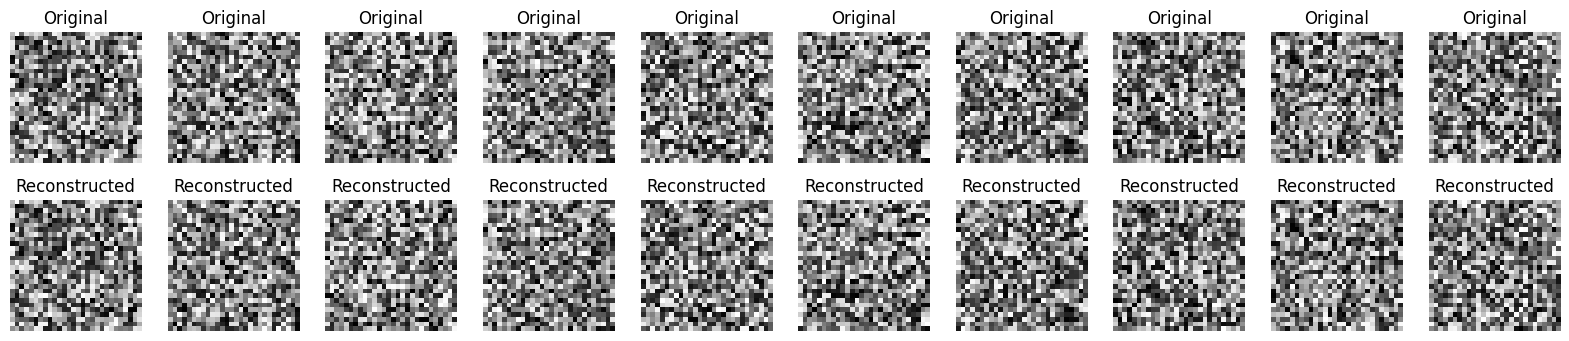

In [16]:
# Predict on test data
y_pred = model.predict(x_test)

# Plot some sample images
n = 10 # Number of sample to display

plt.figure(figsize=(20,4))
for i in range(n):
  # Display original
  ax = plt.subplot(2, n, i+1)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.title('Original')
  plt.axis('off')

  #Display reconstruction
  ax = plt.subplot(2,n, i+1+n)
  plt.imshow(x_test[i].reshape(28,28), cmap='gray')
  plt.title('Reconstructed')
  plt.axis('off')

plt.show()

model.predict generates predictions for the test data.

plt.imshow visualizes the original and reconstructed images side by side for comparison.

**Experiment with Different Kernel Sizes**

Objective: Understand the impact of different kernel sizes on the model's performance.

Instructions:

    Modify the kernel size of the Conv2D and Conv2DTranspose layers.
    Recompile, train, and evaluate the model.
    Observe and record the differences in performance.


In [18]:
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different kernel sizes
conv_layer = Conv2D(filters=32, kernel_size=(5, 5), activation='relu', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(5, 5), activation='sigmoid', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# Use x_train and y_train instead of X_train and y_train
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
# Use x_test and y_test instead of X_test and y_test
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 41ms/step - loss: 0.0740 - val_loss: 0.0428
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - loss: 0.0347 - val_loss: 0.0145
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0115 - val_loss: 0.0057
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0052 - val_loss: 0.0041
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - loss: 0.0039 - val_loss: 0.0035
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - loss: 0.0035 - val_loss: 0.0033
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0032 - val_loss: 0.0030
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0030 - val_loss: 0.0028
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0028 - val_loss: 0.0026
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 0.0026 - val_loss: 0.0025
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0025
Test loss: 0.0024614979047328234


**Add Dropout Layers**

Objective: Add dropout layers to prevent overfitting.

Instructions:

    Add dropout layers after the convolutional layer.
    Set the dropout rate to 0.5.
    Recompile, train, and evaluate the model.


In [20]:
from tensorflow.keras.layers import Dropout, Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional, dropout, and transpose convolutional layers
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')(input_layer)
dropout_layer = Dropout(0.5)(conv_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same')(dropout_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# Changed X_train and y_train to x_train and y_train
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
# Changed X_test and y_test to x_test and y_test
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 0.0820 - val_loss: 0.0657
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - loss: 0.0627 - val_loss: 0.0454
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.0434 - val_loss: 0.0269
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 28ms/step - loss: 0.0287 - val_loss: 0.0162
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0203 - val_loss: 0.0106
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0161 - val_loss: 0.0078
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - loss: 0.0137 - val_loss: 0.0063
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0123 - val_loss: 0.0053
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 27ms/step - loss: 0.0113 - val_loss: 0.0046
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - loss: 0.0106 - val_loss: 0.0040
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0041
Test loss: 0.004050720948725939


**Use Different Activation Functions**

Objective: Experiment with different activation functions and observe their impact on model performance.

Instructions:

    Change the activation function of the convolutional and transpose convolutional layers to tanh.
    Recompile, train, and evaluate the model.


In [22]:
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Input
from tensorflow.keras.models import Model

# Define the input layer
input_layer = Input(shape=(28, 28, 1))

# Add convolutional and transpose convolutional layers with different activation functions
conv_layer = Conv2D(filters=32, kernel_size=(3, 3), activation='tanh', padding='same')(input_layer)
transpose_conv_layer = Conv2DTranspose(filters=1, kernel_size=(3, 3), activation='tanh', padding='same')(conv_layer)

# Create the model
model = Model(inputs=input_layer, outputs=transpose_conv_layer)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
# Changed X_train and y_train to x_train and y_train
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
# Changed X_test and y_test to x_test and y_test
loss = model.evaluate(x_test, y_test)
print(f'Test loss: {loss}')

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.2322 - val_loss: 0.0738
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - loss: 0.0606 - val_loss: 0.0338
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0286 - val_loss: 0.0165
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0142 - val_loss: 0.0091
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - loss: 0.0082 - val_loss: 0.0063
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0059 - val_loss: 0.0052
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0051 - val_loss: 0.0048
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 0.0047 - val_loss: 0.0045
Epoch 9/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0045 - val_loss: 0.0044
Epoch 10/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - loss: 0.0043 - val_loss: 0.0043
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0043
Test loss: 0.004275387618690729
